In [1]:
import numpy as np
from SERGIO.GRN import grn_from_human,grn_from_networkx,grn_random_graph
from SERGIO._sergio import sergio
from SERGIO.MR import mrProfile
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from SERGIO.GRN._grn import GRN
import random
from SERGIO.GRN._components import Gene, SingleInteraction

- need 10000 cells to have the distribution of cells matching  when you repeat from h
I take a master regulator and I change its transcription. If I take as initial condition the final state of the unperturbed trajectory, I do not observe a drammatic change in the dynamics

In [2]:
grn0 = grn_random_graph(100)
G = grn0.to_networkx()


/home/giuseppe/Documents/Sergio_perturbation/SERGIO/GRN/_create.py:347: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  J = nx.adjacency_matrix(G)


In [3]:
grn = copy.deepcopy(grn0)
mrs = grn.get_mrs()
mr_profs = mrProfile(MR_names = mrs, n_types = 1)
mr_profs.build_rnd(range_dict={'L': [1, 2.5], 'H': [3.5, 5]})
grn.init(mr_profs, update_half_resp = True)
sim = sergio(grn)

In [4]:

%time sim.simulate(nCells = 10000, noise_s = 1, safety_iter = 150, scale_iter = 10)
expr = sim.getSimExpr()

CPU times: user 10min 46s, sys: 798 ms, total: 10min 47s
Wall time: 10min 47s


use as initial condition empty simulation

In [5]:
scale_prod = 1
#grn1 = copy.deepcopy(grn)#to use as initial condition the endpoint of previous simulation
grn1 = copy.deepcopy(grn0)#to use as initial condition empty simulation
mrs = grn1.get_mrs()

target_gene = list(mr_profs.profile.keys())[0]
crispr = copy.deepcopy(mr_profs)
crispr.profile[target_gene]=mr_profs.profile[target_gene]*scale_prod
grn1.init(crispr, update_half_resp = True)
sim3 = sergio(grn1)
%time sim3.simulate(nCells = 10000, noise_s = 1, safety_iter = 150, scale_iter = 10)
expr3 = sim3.getSimExpr()

CPU times: user 11min 27s, sys: 196 ms, total: 11min 27s
Wall time: 11min 28s


array([2.19487868])

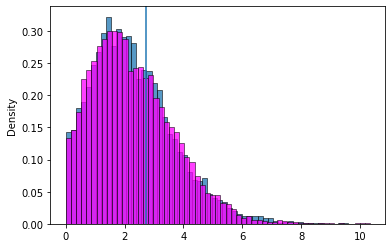

In [11]:
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == target_gene][0]],stat = 'density')
sns.histplot(expr3.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == target_gene][0]],stat = 'density',color='magenta')
plt.axvline(grn.attr_['genes'][target_gene].ss_conc_/0.8)
grn1.attr_['genes'][target_gene].ss_conc_


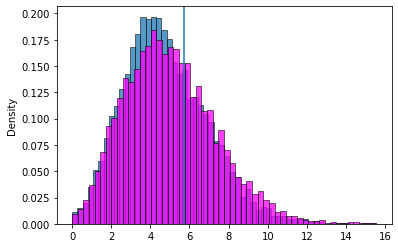

In [27]:
gene_nonmr = random.sample(set(grn.attr_['genes'])-grn.attr_['mrs'],1)[0]
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == gene_nonmr][0]],stat = 'density')
sns.histplot(expr3.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == gene_nonmr][0]],stat = 'density',color='magenta')
plt.axvline(grn.attr_['genes'][gene_nonmr].ss_conc_/0.8)


'66'

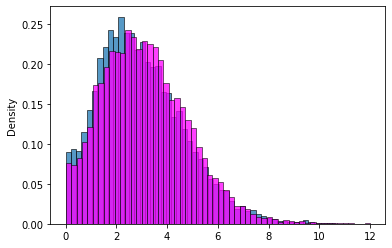

In [19]:

gene_mr = random.sample(grn.attr_['mrs'],1)[0]
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == gene_mr][0]],stat = 'density')
sns.histplot(expr3.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == gene_mr][0]],stat = 'density',color='magenta')
grn.attr_['genes'][gene_mr]._calc_prod([0]),grn1.attr_['genes'][gene_mr]._calc_prod([0])
plt.axvline(grn.attr_['genes'][gene_r].ss_conc_/0.8)


 use as initial condition the endpoint of previous simulation

In [9]:
scale_prod = 4.
#grn1 = copy.deepcopy(grn)#to use as initial condition the endpoint of previous simulation
grn1 = copy.deepcopy(grn0)#to use as initial condition empty simulation
mrs = grn1.get_mrs()
target_gene = list(mr_profs.profile.keys())[0]
crispr = copy.deepcopy(mr_profs)
crispr.profile[target_gene]=mr_profs.profile[target_gene]*scale_prod
grn1.init(crispr, update_half_resp = True)
sim2 = sergio(grn1)
sim2.simulate(nCells = 10000, noise_s = 1, safety_iter = 150, scale_iter = 10)
expr2 = sim2.getSimExpr()

(array([5.6882521]), array([22.75300841]))

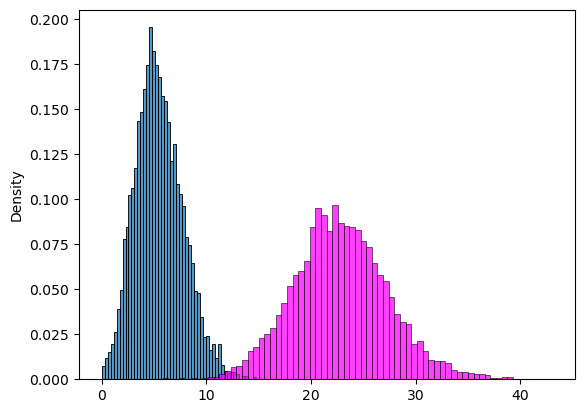

In [10]:
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == target_gene][0]],stat = 'density')
sns.histplot(expr2.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == target_gene][0]],stat = 'density',color='magenta')
grn.attr_['genes'][target_gene].ss_conc_,grn1.attr_['genes'][target_gene].ss_conc_

In [8]:
sim.grn_.attr_['genes'][target_gene].ss_conc_,sim2.grn_.attr_['genes'][target_gene].ss_conc_

(array([5.6882521]), array([22.75300841]))

In [88]:
grn0.attr_['genes'][sim.gNames_[1]].ss_conc_

In [78]:
grn0.attr_['genes'][sim.gNames_[1]]._calc_prod([0])

TypeError: 'NoneType' object is not subscriptable

In [84]:
for g in grn0.attr_['mrs']:
    grn0.attr_['genes'][g].isMR_ = True
grn0._set_levels()
grn0._set_MR_profile(mr_profs)
grn0._estimate_params(half_resp = True)

In [56]:
sorted(set(grn0.attr_['mrs'])),sorted( set(mr_profs.profile.keys()))

(['11', '16', '22', '25', '30', '33', '36', '4', '64', '72', '9'],
 ['11', '16', '22', '25', '30', '33', '36', '4', '64', '72', '9'])

In [61]:
def init(self, mr_profile, update_half_resp = True):
    for g in self.attr_['mrs']:
        self.attr_['genes'][g].isMR_ = True
    self._set_levels()
    self._set_MR_profile(mr_profile)
    self._estimate_params(half_resp = update_half_resp)
